# Artificial Intelligence Nanodegree

## Convolutional Neural Networks

---

In this notebook, we train an MLP to classify images from the MNIST database.

### 1. Load MNIST Database

In [39]:
from keras.datasets import mnist

# use Keras to import pre-shuffled MNIST database
(X_train, y_train), (X_test, y_test) = mnist.load_data(path="C:/Training/udacity/AI_NanoDegree/Term2/3.Convolutional Neural Networks Videos/datasets/mnist.npz")

print("The MNIST database has a training set of %d examples." % len(X_train))
print("The MNIST database has a test set of %d examples." % len(X_test))

The MNIST database has a training set of 60000 examples.
The MNIST database has a test set of 10000 examples.


### 2. Visualize the First Six Training Images

In [40]:
num_classes = (np.unique(y_train))
print(num_classes)

[0 1 2 3 4 5 6 7 8 9]


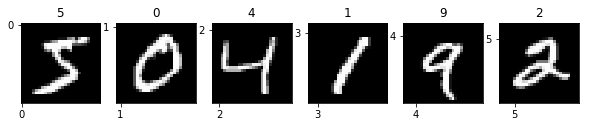

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm
import numpy as np

# plot first six training images
fig = plt.figure(figsize=(10,10))
for i in range(6):
    ax = fig.add_subplot(1, 6, i+1, xticks=[i], yticks=[i])
    ax.imshow(X_train[i], cmap='gray')
    ax.set_title(str(y_train[i]))

### 3. View an Image in More Detail

28 28 <built-in method max of numpy.ndarray object at 0x000001984281C580>
252


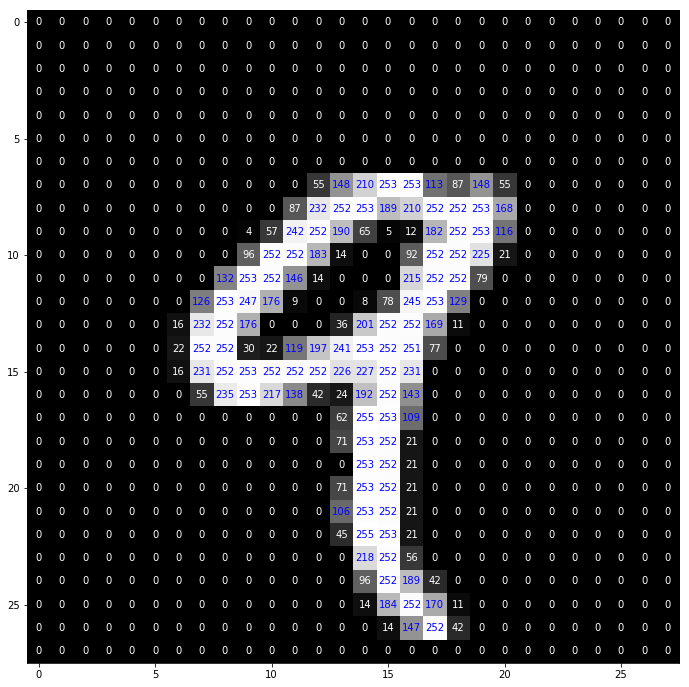

In [42]:
def visualize_input(img, ax):
    ax.imshow(img, cmap='gray')
    width, height = img.shape
    print(width, height,img.max)
    thresh = img.max()/2.5
    
    for x in range(width):
        for y in range(height):
            ax.annotate(str(round(img[x][y],2)), xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if img[x][y]<thresh else 'blue')
    print(img[15][15])
fig = plt.figure(figsize = (12,12)) 
ax = fig.add_subplot(111)
#print(X_train[0])
visualize_input(X_train[4], ax)

### 4. Rescale the Images by Dividing Every Pixel in Every Image by 255

In [43]:
# rescale [0,255] --> [0,1]
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255 

### 5. Encode Categorical Integer Labels Using a One-Hot Scheme

In [44]:
from keras.utils import np_utils
#print(y_train[:5])
# print first ten (integer-valued) training labels
print('Integer-valued labels:')
print(y_train[:10])

# one-hot encode the labels
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

# print first ten (one-hot) training labels
print('One-hot labels:')
print(y_train[:10])

Integer-valued labels:
[5 0 4 1 9 2 1 3 1 4]
One-hot labels:
[[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]]


### 6. Define the Model Architecture

In [45]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten

# define the model
model = Sequential()
model.add(Flatten(input_shape=X_train.shape[1:]))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

# summarize the model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_6 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                5130      
Total params: 669,706.0
Trainable params: 669,706.0
Non-trainable params: 0.0
________________________________________________________________

### 7. Compile the Model

In [46]:
# compile the model
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
              metrics=['accuracy'])

### 8. Calculate the Classification Accuracy on the Test Set (Before Training)

In [48]:
# evaluate test accuracy
score = model.evaluate(X_test, y_test, verbose=1)
accuracy = 100*score[1]

# print test accuracy
print('Test accuracy: %.4f%%' % accuracy)

 9600/10000 [===========================>..] - ETA: 0sTest accuracy: 10.5400%


### 9. Train the Model

In [49]:
from keras.callbacks import ModelCheckpoint   

#C:/Training/udacity/AI_NanoDegree/Term2/3.Convolutional Neural Networks Videos/code/aind2-cnn-master/mnist-mlp
# train the model
#ModelCheckpoint(filepath='C:/Training/udacity/AI_NanoDegree/Term2/3.Convolutional Neural Networks Videos/code/aind2-cnn-master/model_best.txt', 
checkpointer = ModelCheckpoint(filepath='mnist.model.best.hdf5',
                               verbose=1, save_best_only=True)
hist = model.fit(X_train, y_train, batch_size=128, epochs=4,
          validation_split=0.2, callbacks=[checkpointer],
          verbose=1, shuffle=True)

Train on 48000 samples, validate on 12000 samples
Epoch 1/4
48000/48000 [==============================] - 12s - loss: 0.2731 - acc: 0.9148 - val_loss: 0.1212 - val_acc: 0.9644
Epoch 2/4
48000/48000 [==============================] - 11s - loss: 0.1111 - acc: 0.9656 - val_loss: 0.1051 - val_acc: 0.9685
Epoch 3/4
48000/48000 [==============================] - 11s - loss: 0.0831 - acc: 0.9757 - val_loss: 0.1013 - val_acc: 0.9702
Epoch 4/4
48000/48000 [==============================] - 11s - loss: 0.0628 - acc: 0.9806 - val_loss: 0.0898 - val_acc: 0.9766


### 10. Load the Model with the Best Classification Accuracy on the Validation Set

In [50]:
# load the weights that yielded the best validation accuracy
model.load_weights('mnist.model.best.hdf5')

In [20]:
wts = model.get_weights()
print(wts[0:1])

[array([[ 0.06708056, -0.01577798, -0.00777788, ...,  0.06419578,
        -0.01670991,  0.05133905],
       [-0.04749472, -0.06686857, -0.00922154, ...,  0.06430164,
         0.02063352,  0.05692378],
       [ 0.05916291, -0.02559889,  0.02957533, ...,  0.02061526,
        -0.05305594,  0.0127743 ],
       ..., 
       [ 0.05892767, -0.01718237,  0.05009618, ...,  0.06305046,
         0.02367201,  0.0343383 ],
       [ 0.02269916, -0.02666242,  0.0429511 , ..., -0.06020642,
        -0.05841377,  0.02066092],
       [ 0.00158867,  0.03559095, -0.03091061, ...,  0.00907341,
        -0.03223499, -0.00397168]], dtype=float32)]


### 11. Calculate the Classification Accuracy on the Test Set

In [51]:
# evaluate test accuracy
score = model.evaluate(X_test, y_test, verbose=0)
accuracy = 100*score[1]

# print test accuracy
print('Test accuracy: %.4f%%' % accuracy)

Test accuracy: 97.9200%


In [52]:
prd =model.predict( X_test, batch_size=32, verbose=0)

print(prd)

[[  1.64802536e-12   4.33626017e-11   2.54447552e-09 ...,   9.99999762e-01
    7.91212929e-12   2.78836808e-07]
 [  4.81751153e-16   2.18618723e-09   1.00000000e+00 ...,   3.40650902e-13
    1.66364093e-11   6.19563893e-21]
 [  1.77447404e-07   9.99705613e-01   1.48982599e-05 ...,   1.62901764e-04
    9.73841015e-05   2.74974582e-07]
 ..., 
 [  1.43401170e-14   2.20428634e-10   5.45640193e-13 ...,   2.25221033e-08
    1.29563603e-07   3.94684957e-06]
 [  1.24569070e-13   1.89454792e-14   1.36529310e-16 ...,   9.39237837e-13
    1.23503605e-06   1.52566050e-14]
 [  2.35651640e-13   1.45712352e-16   3.51978714e-14 ...,   3.09509692e-20
    3.18221990e-12   1.75599045e-17]]


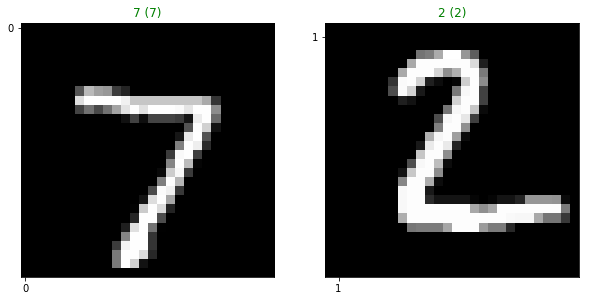

In [53]:
y_hat = model.predict(X_test)

fig = plt.figure(figsize=(10,10))
for i in range(2):
    ax = fig.add_subplot(1,2, i+1, xticks=[i], yticks=[i])
#    ax.imshow(X_test[i], cmap='gray')
    ax.imshow(np.squeeze(X_test[i]), cmap='gray')
    pred_idx = np.argmax(y_hat[i])
    true_idx = np.argmax(y_test[i])
    ax.set_title("{} ({})".format(num_classes[pred_idx], num_classes[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))